In [1]:
import pandas as pd
import string
from collections import Counter
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import sklearn
import numpy as np
from glob import glob
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline 

from os import listdir
from nltk.corpus import stopwords
from pickle import dump
from string import punctuation

from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers import LSTM
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from pickle import load

import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

import csv, string

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [2]:
df_train = pd.read_csv('/home/rkarim/BiB_2019_Clustering_Paper/Keras_Deep_Clustering/drugsCom_raw/drugsComTrain_raw.tsv', sep='\t')
df_test = pd.read_csv('/home/rkarim/BiB_2019_Clustering_Paper/Keras_Deep_Clustering/drugsCom_raw/drugsComTest_raw.tsv', sep='\t')

In [3]:
df_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
df_full = pd.concat([df_train, df_test], ignore_index=True)

In [5]:
df_full.count()

Unnamed: 0     215063
drugName       215063
condition      213869
review         215063
rating         215063
date           215063
usefulCount    215063
dtype: int64

In [6]:
df_full_new = df_full[['review','rating']]
#df_full_new['rating'].unique()

In [7]:
df_full_new.loc[df_full_new.rating <= 4, 'rating'] = 0
df_full_new.loc[df_full_new.rating > 7, 'rating'] = 2
df_full_new.loc[df_full_new.rating >= 5, 'rating'] = 1

/home/rkarim/.local/lib/python3.5/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from joblib import dump, load
from sklearn.model_selection import train_test_split
import numpy as np

reviews = df_full_new['review'].values
y = df_full_new['rating'].values

In [10]:
vectorizer = CountVectorizer()
vectorizer.fit(reviews)
X = vectorizer.transform(reviews)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(np.shape(X_train))
print('Done transforming')

(150544, 53558)
Done transforming


In [11]:
classifier = LogisticRegression(max_iter=10)
classifier.fit(X_train, y_train)
print('Done fitting')

dump(classifier, 'classifier')
print('Done dumping')

classifier = load('classifier')
y_pred = classifier.predict(X_test)
print('Done loading')

c:\users\admin-karim\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\admin-karim\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Done fitting
Done dumping
Done loading


c:\users\admin-karim\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
print('\nClassification report:\n', classification_report(y_pred, y_test))


Classification report:
               precision    recall  f1-score   support

         0.0       0.71      0.70      0.71     16272
         1.0       0.15      0.49      0.22      2918
         2.0       0.92      0.79      0.85     45329

    accuracy                           0.75     64519
   macro avg       0.59      0.66      0.59     64519
weighted avg       0.83      0.75      0.79     64519



In [9]:
import gensim
en_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [10]:
def load_embeddings(model, words):
    #en_model = Word2Vec.load_word2vec_format('C:/Users/admin-karim/Downloads/GoogleNews-vectors-negative300.bin.gz', binary=True, norm_only=True)
    #en_model = ft.load_fasttext_format('C:/Users/admin-karim/Downloads/GoogleNews-vectors-negative300.bin.gz')
    embedding = np.array([])
    for word in words:
        embedding = np.append(embedding, model[word[0]])
    return embedding

In [11]:
def tokenize(text, n_grams):
    """
    remove punctuation and non-alpha characters, return all tokens after lower case-ing and splitting by space
    :param n_grams: length of n-gram
    :param text:
    :return:
    """
    tokens = text.split()
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [word.lower() for word in tokens]
    tokens = [token for token in tokens if token not in stopwords]
    return [' '.join(x) for x in ngrams(tokens, n_grams)]

In [12]:
def ngrams(tokens, n):
    output = []
    for i in range(len(tokens) - n + 1):
        output.append(tokens[i:i + n])
    return output

In [13]:
def top_words(lines, num_words, n_grams):
    all_tokens = []
    for line in lines:
        tokens = tokenize(line, n_grams)
        for t in tokens:
            if t not in stopwords:
                all_tokens.append(t)
    counter = Counter(all_tokens)
    return counter.most_common(num_words)

In [14]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def filter_stop_words(train_sentences, stop_words):
    for i, sentence in enumerate(train_sentences):
        new_sent = [word for word in sentence.split() if word not in stop_words]
        train_sentences[i] = ' '.join(new_sent)
    return train_sentences

train_sentences = filter_stop_words(reviews, stop_words)

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(reviews)

In [15]:
def encode_text(tokenizer, reviews, length):
    #print(lines)
    encoded=tokenizer.texts_to_sequences(reviews)
    print(encoded[0:10])
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded

In [16]:
trainLength=300
vocab_size=len(tokenizer.word_index)+1
print('Max document length: %d' % trainLength)
print('Vocabulary size: %d' % vocab_size)
print()
X_train = encode_text(tokenizer, reviews, trainLength)
print(X_train.shape)
#trainX[2]

Max document length: 300
Vocabulary size: 53636

[[3, 7, 137, 1, 16, 790, 2936, 49, 91, 3843, 1552], [15, 589, 3394, 1628, 33, 3326, 460, 345, 1190, 312, 89, 33, 19, 8, 2347, 90, 223, 232, 59, 23, 95, 899, 22, 266, 3523, 732, 591, 159, 87, 218, 448, 455, 2758, 369, 2075, 1824, 1, 593, 35, 1392, 144, 200, 730, 23, 150, 455, 99, 144, 17, 89, 59, 23, 233, 325, 315, 51, 14269, 111, 315, 188, 479, 253, 65, 151, 188, 3523, 315, 2164, 208, 1913, 334, 1947, 54, 460, 75, 155, 181, 356, 108, 242], [1, 94, 16, 206, 1167, 1816, 860, 30, 482, 193, 235, 113, 1875, 49, 23, 7, 13, 97, 6363, 1262, 28300, 1150, 938, 1, 280, 9092, 3124, 1076, 236, 139, 507, 1, 19, 9092, 359, 14, 5, 37, 2001, 200, 179, 37, 402, 59, 32, 236, 8, 201, 416, 59, 32, 179, 57, 515, 416, 208, 40, 68, 140, 515, 37, 402, 59, 32, 3, 2, 10, 367, 515, 33, 1, 47, 192, 1441, 887, 17, 410, 7, 1, 66, 2, 4, 7, 13, 17, 936, 37, 325, 10618, 7653], [28, 14, 24, 122, 687, 81, 63, 1, 2, 6, 542, 1, 55, 389, 1, 159, 18, 285, 14, 3, 664, 765, 924,

In [ ]:
# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014

print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

%matplotlib inline

from sklearn import manifold, datasets

X = X_train


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)

plt.show()

Automatically created module for IPython interactive environment
Computing embedding


In [17]:
NUM_WORDS=200000
EMBEDDING_DIM=300

vocabulary_size=len(tokenizer.word_index)+1
word_index=tokenizer.word_index
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))

for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector=en_model[word]
        embedding_matrix[i]=embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(en_model)

In [18]:
embedding_layer = Embedding(vocabulary_size, EMBEDDING_DIM, weights=[embedding_matrix],trainable=False)

In [97]:
# define the model
def define_model(length, vocab_size):
	# channel 1
	input1 = Input(shape=(length,))
	embedding_layer_1 = embedding_layer(input1)
	conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding_layer_1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)
    
	# channel 2
	input2 = Input(shape=(length,))
	embedding_layer_2 = embedding_layer(input2)
	conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding_layer_2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)
    
	# channel 3
	input3 = Input(shape=(length,))
	embedding_layer_3 = embedding_layer(input3)
	conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding_layer_3)
	drop3 = Dropout(0.5)(conv3)
	pool3 = MaxPooling1D(pool_size=2)(drop3)
	flat3 = Flatten()(pool3)
    
	# merge
	CNN_layer = concatenate([flat1, flat2, flat3])
    
	# LSTM
	x = embedding_layer(input3)
	LSTM_layer = LSTM(128)(x)

	CNN_LSTM_layer = concatenate([LSTM_layer, CNN_layer])
    
	# interpretation
	dense1 = Dense(10, activation='relu')(CNN_LSTM_layer)
	outputs = Dense(3, activation='softmax')(dense1)
	model = Model(inputs=[input1, input2, input3], outputs=outputs)
    
	# compile
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
	# summarize
	#print(model.summary())
    
	return model

In [98]:
model= define_model(EMBEDDING_DIM,vocabulary_size)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 300)     16090800    input_4[0][0]                    
                                                                 input_5[0][0]                    
          

In [17]:
from keras.utils import to_categorical

def toCategorical(y):
    y = to_categorical(y)
    return y

In [18]:
y_train = toCategorical(y)

In [103]:
model.fit([X_train,X_train,X_train], y_train, epochs=1, batch_size=128, validation_split=0.1)

Train on 193556 samples, validate on 21507 samples
Epoch 1/1
193556/193556 [==============================] - 3824s 20ms/step - loss: 0.7614 - acc: 0.6850 - val_loss: 0.6952 - val_acc: 0.7203


In [104]:
n_clusters = len(np.unique(y))
print("Number of cluster: " + str(n_clusters))
print("Input shape: " + str(X_train.shape))

print("Timestep: " + str(X_train.shape[0]))
print("Data dimension: " + str(X_train.shape[1]))

Number of cluster: 3
Input shape: (215063, 300)
Timestep: 215063
Data dimension: 300


In [55]:
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, LSTM, RepeatVector
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.optimizers import SGD, RMSprop, Adam
from keras import objectives
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

def LSTM_AE(timesteps):
    """
    Creates an LSTM Autoencoder (VAE). Returns Autoencoder, Encoder, Generator. 
    (All code by fchollet - see reference.)
    # Arguments
        input_dim: int.
        timesteps: int, input timestep dimension.
        latent_dim: int, latent z-layer shape. 
    # References
        - [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
    """

    inputs = Input(shape=(EMBEDDING_DIM,))
    x = embedding_layer(inputs)
    
    encoded = LSTM(256, activation='relu',return_sequences=True)(x)
    encoded = LSTM(128, activation='relu',return_sequences=True)(x)
    encoded = LSTM(64, activation='relu',return_sequences=False)(encoded)
    bn = BatchNormalization()(encoded)
    do = Dropout(0.5)(bn)
    
    decoded = RepeatVector(timesteps)(do)    
    decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
    decoded = LSTM(128, activation='relu', return_sequences=True)(decoded)
    decoded = LSTM(256, activation='relu', return_sequences=True)(decoded)
    bn = BatchNormalization()(decoded)
    do = Dropout(0.5)(bn)
    decoded = TimeDistributed(Dense(EMBEDDING_DIM))(bn)
    
    return Model(inputs=inputs, outputs=decoded, name='LSTM_AE'), Model(inputs=inputs, outputs=encoded, name='encoder')

In [56]:
autoencoder, encoder = LSTM_AE(1)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 300)          16090800  
_________________________________________________________________
lstm_16 (LSTM)               (None, 300, 128)          219648    
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                49408     
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 1, 64)             0         
__________

In [57]:
from keras.layers import BatchNormalization

embedding_layer_v2 = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=300,
                                trainable=False)

inputs = Input(shape=(EMBEDDING_DIM, ))
embedded_sequences = embedding_layer_v2(inputs)
encoded = LSTM(128)(embedded_sequences)
bn = BatchNormalization()(encoded)
do = Dropout(0.5)(bn)

decoded = RepeatVector(EMBEDDING_DIM)(bn)
decoded = LSTM(EMBEDDING_DIM)(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dropout(0.5)(decoded)

#decoded = Dropout(0.5)(decoded)
#decoded = Dense(300, activation='softmax')(decoded)

sequence_autoencoder = Model(inputs, decoded)

encoder = Model(inputs, encoded)

In [58]:
timesteps =  1 # equal to the lookback
#autoencoder, encoder = LSTM_AE(timesteps)
sequence_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 300, 300)          16090800  
_________________________________________________________________
lstm_21 (LSTM)               (None, 128)               219648    
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 300, 128)          0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 300)               514800    
_________________________________________________________________
batch_normalization_9 (Batch (None, 300)               1200      
__________

In [59]:
pretrain_epochs = 10
batch_size = 1024
save_dir = 'results/'

In [60]:
sequence_autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [61]:
sequence_autoencoder.fit(X_train, y, batch_size=batch_size, epochs=pretrain_epochs)

Epoch 1/10
215063/215063 [==============================] - 1305s 6ms/step - loss: 6.1830
Epoch 2/10
215063/215063 [==============================] - 1305s 6ms/step - loss: 6.4003
Epoch 3/10
215063/215063 [==============================] - 1305s 6ms/step - loss: 5.9902
Epoch 4/10
215063/215063 [==============================] - 1305s 6ms/step - loss: 6.0908
Epoch 5/10
215063/215063 [==============================] - 1305s 6ms/step - loss: 6.2060
Epoch 6/10
215063/215063 [==============================] - 1306s 6ms/step - loss: 6.5142
Epoch 7/10
215063/215063 [==============================] - 1306s 6ms/step - loss: 5.8817
Epoch 8/10
215063/215063 [==============================] - 1306s 6ms/step - loss: 5.8888
Epoch 9/10
215063/215063 [==============================] - 1306s 6ms/step - loss: 5.7886
Epoch 10/10
215063/215063 [==============================] - 1306s 6ms/step - loss: 5.7553


In [79]:
from keras.engine.topology import Layer, InputSpec

class ClusteringLayer(Layer):
    """
    Clustering layer converts input sample (feature) to soft label, i.e. a vector that represents the probability of the
    sample belonging to each cluster. The probability is calculated with student's t-distribution.

    # Example
    ```
        model.add(ClusteringLayer(n_clusters=10))
    ```
    # Arguments
        n_clusters: number of clusters.
        weights: list of Numpy array with shape `(n_clusters, n_features)` witch represents the initial cluster centers.
        alpha: degrees of freedom parameter in Student's t-distribution. Default to 1.0.
    # Input shape
        2D tensor with shape: `(n_samples, n_features)`.
    # Output shape
        2D tensor with shape: `(n_samples, n_clusters)`.
    """

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight((self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        """ student t-distribution, as same as used in t-SNE algorithm.
         Measure the similarity between embedded point z_i and centroid µ_j.
                 q_ij = 1/(1+dist(x_i, µ_j)^2), then normalize it.
                 q_ij can be interpreted as the probability of assigning sample i to cluster j.
                 (i.e., a soft assignment)
        Arguments:
            inputs: the variable containing data, shape=(n_samples, n_features)
        Return:
            q: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        """
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure each sample's 10 values add up to 1.
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [80]:
clustering_layer = ClusteringLayer(3, name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)
model.compile(optimizer='adam', loss='kld')

In [64]:
from time import time
from keras.datasets import mnist
import numpy as np
np.random.seed(10)
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import DBSCAN
from sklearn import mixture
from sklearn import cluster

In [65]:
kmeans = KMeans(n_clusters=3, n_init=5)
#bKmeans = DBSCAN()
#optics = OPTICS()
#gmm =  mixture.GaussianMixture()
#aggCluster = cluster.AgglomerativeClustering()
#spectral = cluster.SpectralClustering()

In [66]:
y_pred_kmeans = kmeans.fit_predict(encoder.predict(X_train))
#y_pred_bKmeans = bKmeans.fit_predict(encoder.predict(X_train))
#y_pred_optics = optics.fit_predict(encoder.predict(X_train))
#y_pred_gmm = gmm.fit_predict(encoder.predict(X_train))
#y_pred_aggCluster = aggCluster.fit_predict(encoder.predict(X_train))
#y_pred_spectral = spectral.fit_predict(encoder.predict(X_train))

In [67]:
metrics.accuracy_score(y, y_pred_kmeans)

0.24903400398952866

In [69]:
y_pred_last = np.copy(y_pred_kmeans)

In [70]:
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

In [71]:
#computing an auxiliary target distribution
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

In [72]:
loss = 0
index = 0
maxiter = 100
update_interval = 10
index_array = np.arange(X_train.shape[0])
tol = 0.01 # tolerance threshold to stop training

In [73]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q = model.predict(X_train, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p

        # evaluate the clustering performance
        y_pred = q.argmax(1)
        if y is not None:
            acc = np.round(accuracy_score(y, y_pred), 5)
            nmi = np.round(mutual_info_score(y, y_pred), 5)
            ari = np.round(adjusted_rand_score(y, y_pred), 5)
            loss = np.round(loss, 5)
            print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

        # check stop criterion
        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, X_train.shape[0])]
    loss = model.train_on_batch(x=X_train[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= X_train.shape[0] else 0

model.save_weights(save_dir + '/conv_DEC_model_final.h5')

Iter 0: acc = 0.24903, nmi = 0.00001, ari = 0.00002  ; loss= 0
Iter 10: acc = 0.24903, nmi = 0.00001, ari = 0.00002  ; loss= 0.0
delta_label  0.0 < tol  0.01
Reached tolerance threshold. Stopping training.


In [74]:
model.load_weights(save_dir + '/conv_DEC_model_final.h5')

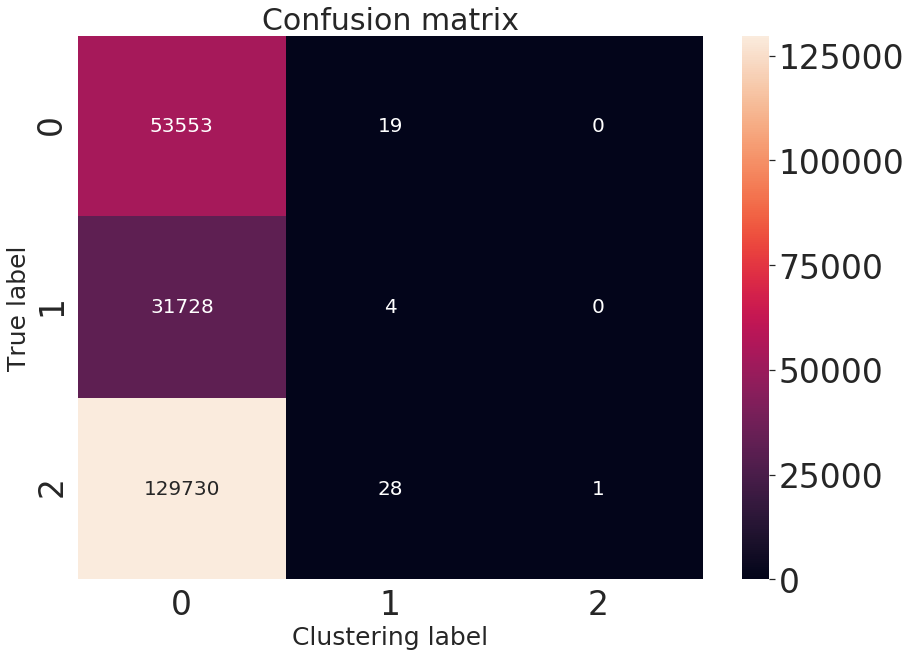

In [75]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

%matplotlib inline

sns.set(font_scale=3)
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred)

plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

In [44]:
def vis_data(x_train_encoded, y_train, vis_dim, n_predict, n_train, build_anim):
    cmap = plt.get_cmap('rainbow', 10)

    # 3-dim vis: show one view, then compile animated .gif of many angled views
    if vis_dim == 3:
        # Simple static figure
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        p = ax.scatter3D(x_train_encoded[:,0], x_train_encoded[:,1], x_train_encoded[:,2], 
                c=y_train[:n_predict], cmap=cmap, edgecolor='black')
        fig.colorbar(p, drawedges=True)
        plt.show()

        # Build animation from many static figures
        if build_anim:
            angles = np.linspace(180, 360, 20)
            i = 0
            for angle in angles:
                fig = plt.figure()
                ax = plt.axes(projection='3d')
                ax.view_init(10, angle)
                p = ax.scatter3D(x_train_encoded[:,0], x_train_encoded[:,1], x_train_encoded[:,2], 
                        c=y_train[:n_predict], cmap=cmap, edgecolor='black')
                fig.colorbar(p, drawedges=True)
                outfile = 'anim/3dplot_step_' + chr(i + 97) + '.png'
                plt.savefig(outfile, dpi=96)
                i += 1
            call(['convert', '-delay', '50', 'anim/3dplot*', 'anim/3dplot_anim_' + str(n_train) + '.gif'])

    # 2-dim vis: plot and colorbar.
    elif vis_dim == 2:
        plt.scatter(x_train_encoded[:,0], x_train_encoded[:,1], 
                c=y_train[:n_predict], edgecolor='black', cmap=cmap)
        plt.colorbar(drawedges=True)
        plt.show()

In [76]:
# Encode a number of MNIST digits, then perform t-SNE dim-reduction.
x_train_predict = encoder.predict(X_train)

#print "Performing t-SNE dimensionality reduction..."
x_train_encoded = TSNE(n_components=2).fit_transform(x_train_predict)
#np.save('%sx_%sdim_tnse_%s.npy' % (266, 2, 266), x_train_encoded)
#x_train_encoded = np.load(str(n_predict) + 'x_' + str(vis_dim) + 'dim_tnse_' + str(n_train) + '.npy')

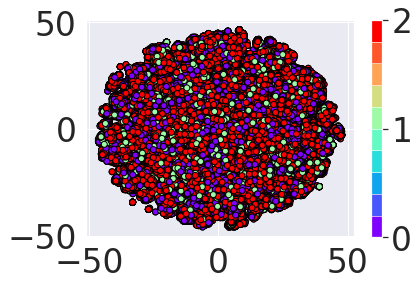

In [77]:
# Visualize result.
train_new = False
n_train = len(X_train)
predict_new = False
n_predict = len(X_train)
vis_dim = 2
build_anim = False
    
vis_data(x_train_encoded, y, vis_dim, n_predict, n_train, build_anim)